In [55]:
import pandas as pd
import numpy as np

## Format ratio

In [187]:
# #Load the dataset:
dfs = pd.read_csv('results/20250513_011031/success_rate.csv', on_bad_lines='warn')



import csv


# with open('results/master/success_rate.csv', newline='', encoding='utf-8') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
#     for row in rows:
#         print(row)




/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/1810319300.py:2: ParserWarning: Skipping line 43: expected 2 fields, saw 3
Skipping line 64: expected 2 fields, saw 3
Skipping line 211: expected 2 fields, saw 3
Skipping line 377: expected 2 fields, saw 3
Skipping line 516: expected 2 fields, saw 3
Skipping line 669: expected 2 fields, saw 3

  dfs = pd.read_csv('results/20250513_011031/success_rate.csv', on_bad_lines='warn')


In [185]:
dfs['Success'].value_counts()

Success
True                                                                                                  166
False                                                                                                 103
Returns:                                                                                               34
"""\r\nTrue,"""                                                                                        30
    None                                                                                               23
                                                                                                     ... 
        ValueError: If a name conflict occurs while registering the Blueprint.                          1
        None                                                                                            1
    # ... (rest of the code remains the same)"                                                          1
Test the functionality of a Flask appl

In [180]:
dfs[dfs['Success'] == '"""\r\nTrue,"""']


,Success,Comment
10,"""""""\r\nTrue,""""""",NaN
19,"""""""\r\nTrue,""""""",NaN
35,"""""""\r\nTrue,""""""",NaN
114,"""""""\r\nTrue,""""""",NaN
122,"""""""\r\nTrue,""""""",NaN
131,"""""""\r\nTrue,""""""",NaN
139,"""""""\r\nTrue,""""""",NaN
146,"""""""\r\nTrue,""""""",NaN
155,"""""""\r\nTrue,""""""",NaN
163,"""""""\r\nTrue,""""""",NaN


In [166]:
success = dfs['Success'].value_counts()[True]
fail = dfs['Success'].value_counts()[False]
total = len(dfs)

print(f"Ratio success: {success}/{total}")

KeyError: True

Random print some of the False.


In [99]:
failed_rows = dfs[dfs['Success'] == 'False']
sample_dfs = dfs.sample(min(10, (max(1,int(total*0.1)))))
for _,row in sample_dfs.iterrows():
    print("------")
    print(row['Comment'])


------
'"""
Deprecates the use of `use_x_sendfile` method and replaces it with using the `USE_X_SENDFILE` configuration option.

### Parameters

- **value** (`bool`): A boolean indicating whether to enable or disable xSendFile functionality.

### Returns

- None
"""
 
import warnings

warnings.warn(
    "\'use_x_sendfile\' is deprecated and will be removed in Flask 2.3. Use"
    " \'USE_X_SENDFILE\' in \'app.config\' instead.",
    DeprecationWarning,
    stacklevel=2,
)

self.config["USE_X_SENDFILE"] = value']
------
'"""
Flask Flash Messages Function

This function utilizes Flask\'s flash messaging system to display messages to the user.
It takes advantage of the `flash` method provided by Flask, which can be used to set and retrieve
messages for different types of notifications (e.g., success, error, warning).

Parameters:
    None

Returns:
    str: An empty string indicating the function has completed its task.

Notes:
- The first call to `flask.flash("Hello World")` sets a defaul

## Semantic Score

In [17]:
#Load the dataset:
df = pd.read_csv('results/master/semantic_score.csv')

In [18]:
df.shape

(136, 6)

In [19]:
df = df[~df.duplicated(subset=['Semantic-Score', 'Original-Comment', 'Agent-Comment'], keep='first')]
df.shape

(56, 6)

In [6]:
df.head()

,Semantic-Score,Code,Original-Comment,Agent-Comment,Filename,Agent-Commit
0,0.653213,def get_debug_flag,"""""""Get whether debug mode should be enabled fo...","""""""\nReturns a boolean indicating whether debu...",src/flask/helpers.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
1,0.593159,def dump,"""""""Serialize data as JSON and write to a file....","""""""\nDumps the provided object to a file strea...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
2,0.600225,def loads,"""""""Deserialize data as JSON.\n\n If :data:`...","""""""\nLoads JSON data from a string or bytes ob...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
3,0.691807,def load,"""""""Deserialize data as JSON read from a file.\...","""""""\nLoads JSON data from a file.\n\nThis func...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
4,0.626986,def response,"""""""Serialize the given arguments as JSON, and ...","""""""\nReturns a response object with the prepar...",src/flask/json/provider.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e


<Axes: >

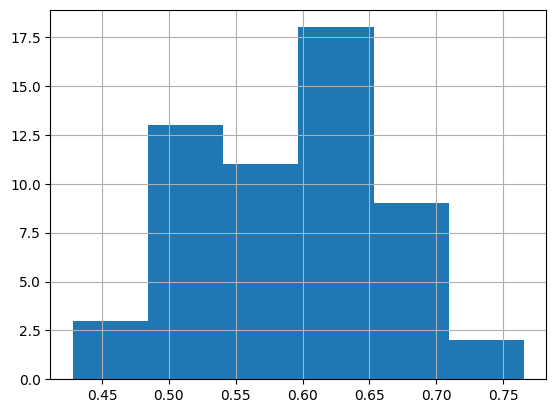

In [7]:
#Draw histogram to see distribution
df['Semantic-Score'].hist(bins=6)

We can see that it follows normal distribution

In [125]:
df['Score-Bin'] = pd.cut(df['Semantic-Score'], bins=6)
# Sample from each bin
n = 0.3
sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
sample_df = sample_df.reset_index(drop=True)
sample_df['Label'] = ''



/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_84591/2376815570.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_84591/2376815570.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))


In [126]:
sample_df.shape

(8, 8)

Iterate, and give labels 'L', 'M' or 'H' before continuing 

In [146]:
sample_df[sample_df['Label'] == ''][['Semantic-Score','Original-Comment', 'Agent-Comment', 'Label']]

,Semantic-Score,Original-Comment,Agent-Comment,Label
0,0.434890,"""""""The Jinja environment used to load template...","""""""\nReturns an instance of Jinja2's Environme...",
1,0.512154,"""""""Reload templates when they are changed. Use...","""""""\nReturns the value of `TEMPLATES_AUTO_RELO...",
2,0.579308,"""""""Determine if the given string is an IP addr...","""""""\nChecks if the provided string is a valid ...",
3,0.599835,"""""""Enable this to use the ``X-Sendfile`` featu...","""""""\nDeprecation Notice:\n\nThe `use_x_sendfil...",
4,0.612413,"""""""Dispatches the request and on top of that p...","""""""\nDispatches the full request, including ru...",
5,0.606191,"""""""This attribute is set to ``True`` if the ap...","""""""\nDeprecation Notice: `got_first_request` i...",
6,0.646095,"""""""The JSON encoder class to use. Defaults to\...","""""""\nDeprecation Warning: `json_encoder` is de...",
7,0.737521,"""""""The name of the cookie set by the session i...","""""""\nReturns the name of the session cookie.\n...",


In [191]:
n = 1

print("""-- LABEL --""")
print(sample_df.iloc[n]["Label"])
print("""-- Original Comment --""")
print(sample_df.iloc[n]["Original-Comment"])
print("""-- Agent Comment --""")
print(sample_df.iloc[n]["Agent-Comment"])

-- LABEL --
L
-- Original Comment --
"""Reload templates when they are changed. Used by
        :meth:`create_jinja_environment`. It is enabled by default in debug mode.

        .. deprecated:: 2.2
            Will be removed in Flask 2.3. Use ``app.config["TEMPLATES_AUTO_RELOAD"]``
            instead.

        .. versionadded:: 1.0
            This property was added but the underlying config and behavior
            already existed.
        """
-- Agent Comment --
"""
Returns the value of `TEMPLATES_AUTO_RELOAD` from the application configuration.

If `TEMPLATES_AUTO_RELOAD` is set, its value is returned. Otherwise, the value of `debug` is used as a fallback.

Deprecated since Flask 2.3 in favor of using `TEMPLATES_AUTO_RELOAD` in `app.config`.

Args:
    None

Returns:
    bool: The value of `TEMPLATES_AUTO_RELOAD` or `debug` if not set.
"""


In [189]:
sample_df.iloc[7,7] = "H"

NOW WE HAVE LABELED ALL THE SAMPLE

In [155]:
summary = sample_df.groupby('Label')['Semantic-Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()
summary

,Label,Mean,Std_Dev,Min,Q1,Median,Q3,Max
0,H,0.671856,0.092864,0.606191,0.639024,0.671856,0.704689,0.737521
1,L,0.515626,0.082527,0.434890,0.473522,0.512154,0.555994,0.599835
2,M,0.612605,0.033394,0.579308,0.595860,0.612413,0.629254,0.646095


In [158]:
# Get Q3 of L and Q1 of M
l_q3 = summary.loc[summary['Label'] == 'L', 'Q3'].values[0]
m_q1 = summary.loc[summary['Label'] == 'M', 'Q1'].values[0]
threshold_L_M = (l_q3 + m_q1) / 2

# Get Q3 of M and Q1 of H
m_q3 = summary.loc[summary['Label'] == 'M', 'Q3'].values[0]
h_q1 = summary.loc[summary['Label'] == 'H', 'Q1'].values[0]
threshold_M_H = (m_q3 + h_q1) / 2

# Show results
print("Threshold between L and M:", round(threshold_L_M, 3))
print("Threshold between M and H:", round(threshold_M_H, 3))

Threshold between L and M: 0.576
Threshold between M and H: 0.634
